In [2]:

import matplotlib.pyplot as plt
import pandas as pd

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

amex_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-12-24,89.50,91.55,89.50,-2.004,90.74,91.33,3190855,20181224,0,392,4.443110,4.863392
2018-12-26,93.84,93.89,89.05,4.849,89.85,89.50,5383666,20181226,2,393,4.479191,4.860273
2018-12-27,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181227,3,394,4.511992,4.857570
2018-12-28,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181228,4,395,4.541811,4.855227
2018-12-31,93.84,93.89,89.05,0.000,89.85,93.84,5383666,20181231,0,396,4.568919,4.853197


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


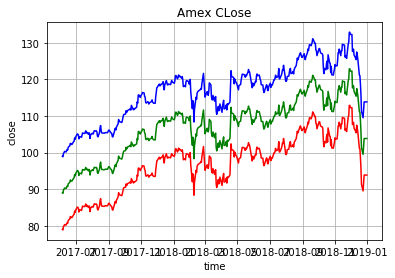

In [3]:

def plot_demo(axs=None, just_series=False):
    """
    Draw Amex stock
    :param axs: axs are subplots
    :param just_series: Draw only series for close price
    :return: 
    """
    # If axes is passed in, use it
    drawer = plt if axs is None else axs
    
    # Series close price, red
    drawer.plot(amex_df.close, c='red')
    
    if not just_series:
        drawer.plot(amex_df.close.index,
                    amex_df.close.values + 10,
                    c='g')
        
        drawer.plot(amex_df.close.index.tolist(),
                    amex_df.close.values + 20,
                    c='b')
    
    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('Amex CLose')
    plt.grid(True)
    
plot_demo()

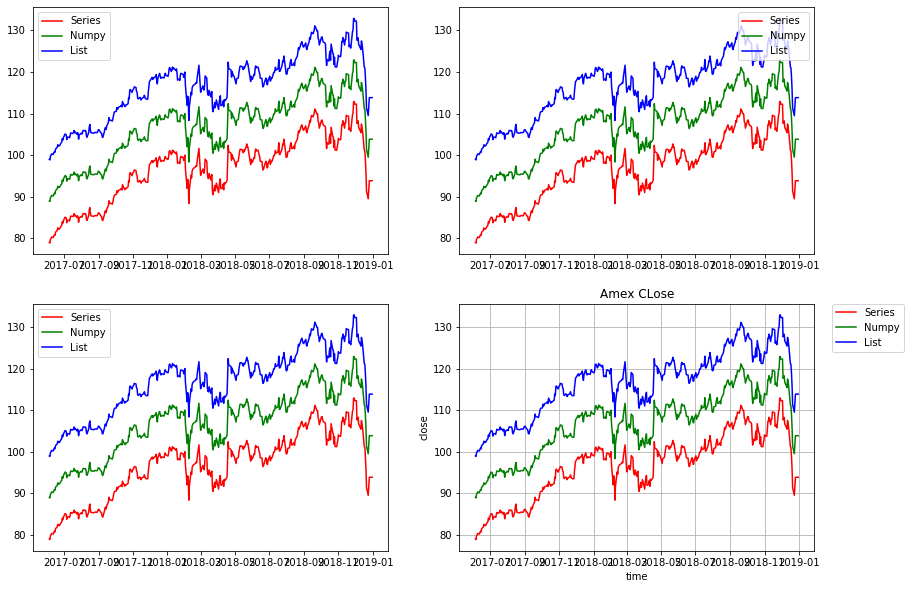

In [13]:
_, axs = plt.subplots(nrows=2, 
                      ncols=2, 
                      figsize=(14, 10))
# Subplot 1
drawer = axs[0][0]
plot_demo(drawer)
drawer.legend(['Series',
               'Numpy',
               'List'],
              loc=0)
# Subplot 2
drawer = axs[0][1]
plot_demo(drawer)
drawer.legend(['Series',
               'Numpy',
               'List'],
              loc=1)
# Subplot 3
drawer = axs[1][0]
plot_demo(drawer)
drawer.legend(['Series',
               'Numpy',
               'List'],
              loc=2)
# Subplot 4
drawer = axs[1][1]
plot_demo(drawer)
drawer.legend(['Series',
               'Numpy',
               'List'],
              bbox_to_anchor=(1.05, 1),
              loc=2,
              borderaxespad=0.)

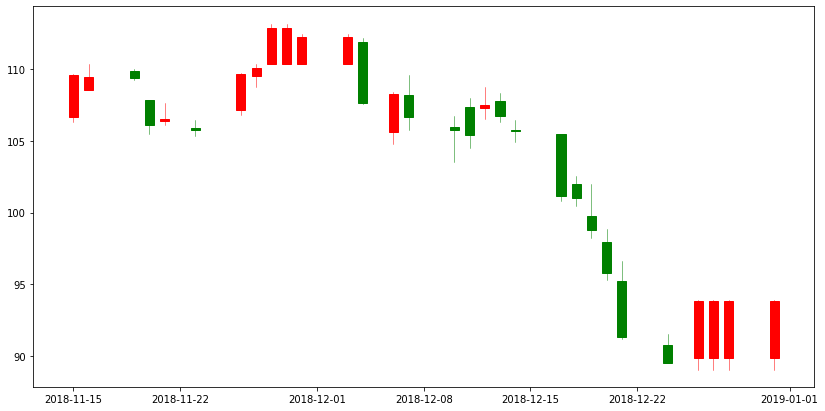

In [22]:
from matplotlib.dates import date2num
import mpl_finance as mpf
__colorup__ = "red"
__colordown__ = "green"
# To Showcase, only show last 30 days of Candlesticks
amex_part_df = amex_df[-30:]

fix, axs = plt.subplots(figsize=(14, 7))
quotes = []
for index, (d, o, c, h, l) in enumerate(
    zip(
        amex_part_df.index, 
        amex_part_df.open,
        amex_part_df.close,
        amex_part_df.high,
        amex_part_df.low
    )):
    # Draw Candle Sticks
    d = date2num(d)
    # Date, Open, CLose, High, Low tuple 
    val = (d, o, c, h, l)
    # Add val to quotes
    quotes.append(val)
    
mpf.candlestick_ochl(axs, 
                     quotes,
                     width=0.6,
                     colorup=__colorup__,
                     colordown=__colordown__)
axs.autoscale_view()
axs.xaxis_date()